# Precision, Recall, F-measure, Support
Machine Learning with Imbalanced Data - Course

* Precision = tp / (tp + fp)

* Recall = tp / (tp + fn)

* F1 = 2 * (precision * recall) / (precision + recall)

* Support = Number of cases on each class

Precision, Recall and therefore F-measure depend on the probability threshold utilised to determine the class output.

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support

from yellowbrick.classifier import ClassificationReport, DiscriminationThreshold

import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
# load data
data = pd.read_csv('../datasets/kdd2004.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1: 0, 1: 1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [3]:
# data size
data.shape

(145751, 75)

In [4]:
# imbalanced target
data.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [5]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

## Baseline: predict the majority class

In [6]:
# baseline prediction: predict the majority class
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

## Train ML models

### Random Forests

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:, 1]
y_test_rf = rf.predict_proba(X_test)[:, 1]

### Logistic Regression

In [8]:
logit = LogisticRegression(random_state=0, max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:, 1]
y_test_logit = logit.predict_proba(X_test)[:, 1]

## Precision

In [9]:
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision Random Forest test: ', precision_score(y_test, rf.predict(X_test)))
print('Precision Logistic Regression test: ', precision_score(y_test, logit.predict(X_test)))

Precision Baseline test:  0.0
Precision Random Forest test:  0.9959183673469387
Precision Logistic Regression test:  0.956953642384106


## Recall

In [10]:
print('Recall Baseline test: ', recall_score(y_test, y_test_base))
print('Recall Random Forest test: ', recall_score(y_test, rf.predict(X_test)))
print('Recall Logistic Regression test: ', recall_score(y_test, logit.predict(X_test)))

Recall Baseline test:  0.0
Recall Random Forest test:  0.6024691358024692
Recall Logistic Regression test:  0.7135802469135802


## F-measure or F1 score

In [11]:
print('F1 score Baseline test: ', f1_score(y_test, y_test_base))
print('F1 score Random Forest test: ', f1_score(y_test, rf.predict(X_test)))
print('F1 score Logistic Regression test: ', f1_score(y_test, logit.predict(X_test)))

F1 score Baseline test:  0.0
F1 score Random Forest test:  0.7507692307692307
F1 score Logistic Regression test:  0.8175388967468176


## All metrics - 1 function

In [12]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, rf.predict(X_test), pos_label=1
)

print('Random Forests Precision: ', precision)
print('Random Forests Recall: ', recall)
print('Random Forests f-score: ', fscore)
print('Support: ', support)

Random Forests Precision:  [0.99629723 0.99591837]
Random Forests Recall:  [0.99997692 0.60246914]
Random Forests f-score:  [0.99813368 0.75076923]
Support:  [43321   405]


The first element in each list corresponds to the metrics for the majority class, the second element in each list corresponds to the metrics for the minority class (see that they coincide with those values obtained when we calculated the metrics individually).

See also that they match with the values obtained with Yellobrick below:

## Full classification report
https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

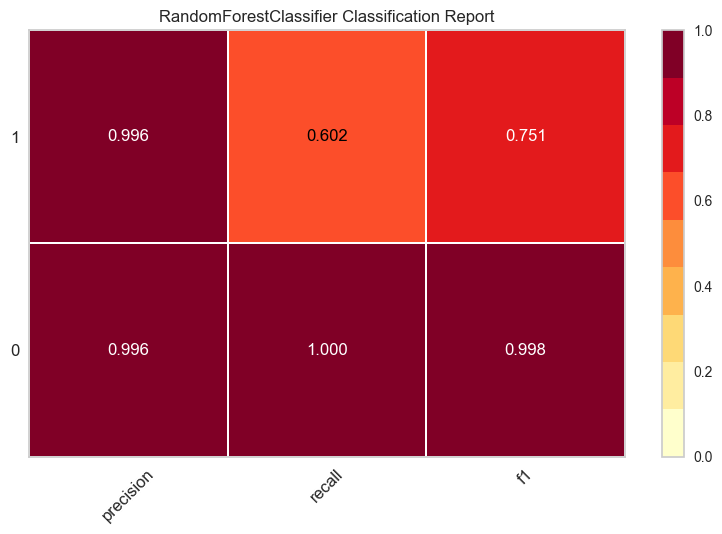

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [13]:
visualizer = ClassificationReport(rf)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

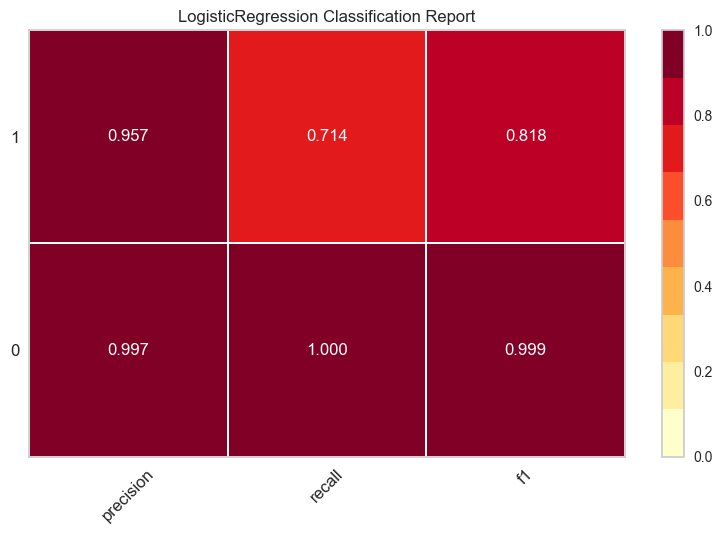

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [14]:
visualizer = ClassificationReport(logit)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Precision and Recall vs probability threshold

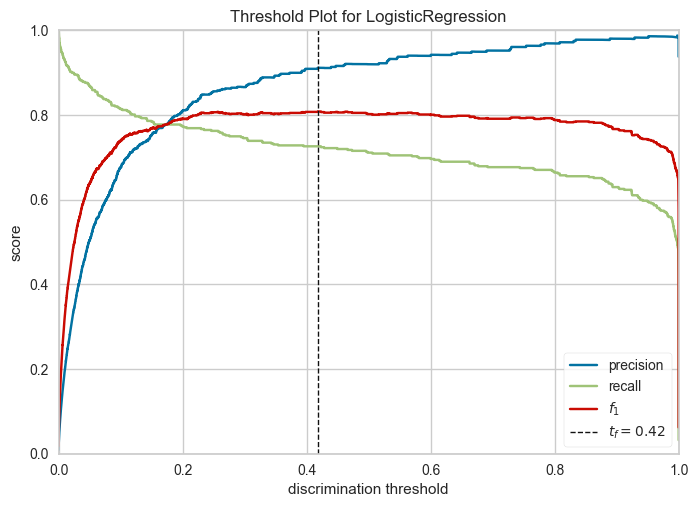

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [15]:
visualizer = DiscriminationThreshold(logit,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude='queue_rate')

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

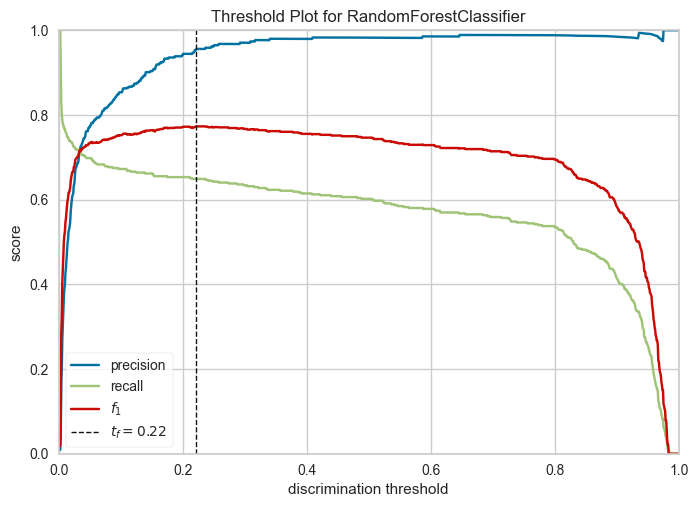

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [16]:
visualizer = DiscriminationThreshold(rf,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude='queue_rate')

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()